In [106]:
%load_ext autoreload
%autoreload 2

import os
from pyciemss.PetriNetODE.interfaces import (
    load_and_sample_petri_model,
    load_and_calibrate_and_sample_petri_model,
    load_and_optimize_and_sample_petri_model,
    load_and_calibrate_and_optimize_and_sample_petri_model,
    posterior_density_petri_model
)
import numpy as np
from pyciemss.visuals import plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
DEMO_PATH = "notebook/integration_demo/"
ASKENET_PATH = "https://raw.githubusercontent.com/DARPA-ASKEM/Model-Representations/main/petrinet/examples/sir_typed.json"

## load_and_sample_petri_model

In [3]:
num_samples = 3
timepoints = [0.5, 1.0, 2.0, 3.0, 4.0]

# Run sampling w/o an intervention
result = load_and_sample_petri_model(ASKENET_PATH, num_samples, timepoints=timepoints, time_unit="days")

# Save results
result["data"].to_csv(os.path.join(DEMO_PATH, "results_petri/sample_results.csv"), index=False)
result["quantiles"].to_csv(
    os.path.join(DEMO_PATH, "results_petri/quantiles_results.csv"), index=False
)

In [4]:
result["quantiles"]

,timepoint_id,number_days,inc_cum,output,type,quantile,value,Forecast_Backcast
0,0,0.5,inc,I,quantile,0.010,9.679479e+02,Forecast
1,0,0.5,inc,I,quantile,0.025,9.679848e+02,Forecast
2,0,0.5,inc,I,quantile,0.050,9.680463e+02,Forecast
3,0,0.5,inc,I,quantile,0.100,9.681694e+02,Forecast
4,0,0.5,inc,I,quantile,0.150,9.682924e+02,Forecast
...,...,...,...,...,...,...,...,...
340,4,4.0,inc,S,quantile,0.850,9.073283e-10,Forecast
341,4,4.0,inc,S,quantile,0.900,9.123062e-10,Forecast
342,4,4.0,inc,S,quantile,0.950,9.172841e-10,Forecast
343,4,4.0,inc,S,quantile,0.975,9.197730e-10,Forecast


In [5]:
result["risk"]

{'I_sol': {'risk': [713.14697265625],
  'qoi': array([713.147  , 665.4437 , 654.34424], dtype=float32)},
 'R_sol': {'risk': [346.6551513671875],
  'qoi': array([287.85327, 335.55603, 346.65515], dtype=float32)},
 'S_sol': {'risk': [6.842536537376986e-10],
  'qoi': array([6.8425365e-10, 4.4837520e-10, 3.2101310e-10], dtype=float32)}}

In [6]:
interventions = [(1.1, "beta", 1.0), (2.1, "gamma", 0.1), (1.3, "beta", 2.0), (1.4, "gamma", 0.3)]

result_int = load_and_sample_petri_model(
    ASKENET_PATH, num_samples, timepoints=timepoints, interventions=interventions,
    time_unit="days",
    visual_options={"title": "SIR Model", "keep": ".*_sol"}
)

# # Save results
# result_int["data"].to_csv(
#     os.path.join(DEMO_PATH, "results_petri/sample_results_w_interventions.csv"),
#     index=False,
# )
# result_int["quantiles"].to_csv(
#     os.path.join(DEMO_PATH, "results_petri/quantiles_results_w_interventions.csv"), index=False
# )

In [7]:
plots.ipy_display(result_int["visual"])

thread '<unnamed>' panicked at 'from_rgba returned None', vl-convert-rs/src/converter.rs:817:14
note: run with `RUST_BACKTRACE=1` environment variable to display a backtrace


ValueError: Vega to SVG conversion failed:
Err(Any { .. })

## load_and_calibrate_and_sample_petri_model

In [9]:
data_path = os.path.join(DEMO_PATH, "data.csv")
num_samples = 10
timepoints = [0.0, 1.0, 2.0, 3.0, 4.0]

# Run the calibration and sampling
result_cal = load_and_calibrate_and_sample_petri_model(
    ASKENET_PATH,
    data_path,
    num_samples,
    timepoints=timepoints,
    verbose=True,
    visual_options={"title": "Intervened SIR Model", "keep":".*_sol"},
    num_iterations=100,
    time_unit = "days"
)

# Save results
result_cal['data'].to_csv(
    os.path.join(DEMO_PATH, "results_petri/calibrated_sample_results.csv"), index=False
)
result_cal["quantiles"].to_csv(
    os.path.join(DEMO_PATH, "results_petri/calibrated_quantiles_results.csv"), index=False
)

iteration 0: loss = 64.62104487419128
iteration 25: loss = 61.8980370759964
iteration 50: loss = 60.334174036979675
iteration 75: loss = 60.00053858757019


Text(0, 0.5, 'gamma')

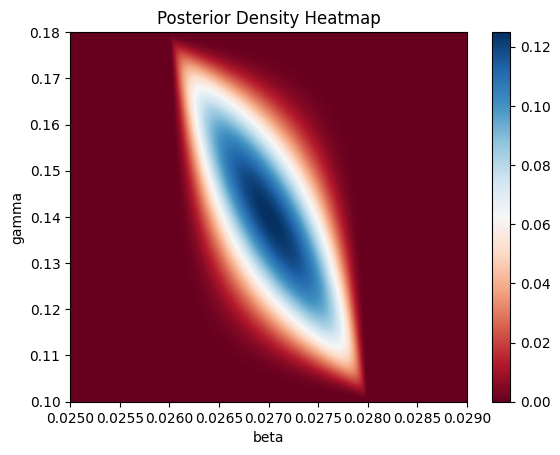

In [138]:
from pyciemss.PetriNetODE.interfaces import (
    load_and_sample_petri_model,
    load_and_calibrate_and_sample_petri_model,
    load_and_optimize_and_sample_petri_model,
    load_and_calibrate_and_optimize_and_sample_petri_model,
    posterior_density_petri_model
)

from itertools import product
import numpy as np

inferred_parameters = result_cal["inferred_parameters"]

betas, gammas = torch.meshgrid(torch.linspace(0.025, 0.029, 1000), torch.linspace(0.1, 0.18, 1000))

density = posterior_density_petri_model(inferred_parameters=inferred_parameters, parameter_values={"beta": betas, "gamma": gammas})

fig, ax = plt.subplots()
c = ax.pcolormesh(betas, gammas, density, cmap='RdBu')
ax.set_title('Posterior Density Heatmap')
fig.colorbar(c, ax=ax)
ax.set_xlabel('beta')
ax.set_ylabel('gamma')

In [9]:
result_cal["quantiles"]

,timepoint_id,number_days,inc_cum,output,type,quantile,value,Forecast_Backcast
0,0,0.0,inc,I,quantile,0.010,1.000000e+00,Backcast
1,0,0.0,inc,I,quantile,0.025,1.000000e+00,Backcast
2,0,0.0,inc,I,quantile,0.050,1.000000e+00,Backcast
3,0,0.0,inc,I,quantile,0.100,1.000000e+00,Backcast
4,0,0.0,inc,I,quantile,0.150,1.000000e+00,Backcast
...,...,...,...,...,...,...,...,...
340,4,4.0,inc,S,quantile,0.850,-6.634919e-11,Forecast
341,4,4.0,inc,S,quantile,0.900,-2.302190e-11,Forecast
342,4,4.0,inc,S,quantile,0.950,9.677443e-11,Forecast
343,4,4.0,inc,S,quantile,0.975,1.566726e-10,Forecast


In [10]:
plots.ipy_display(result_cal["visual"])

## load_and_optimize_and_sample_petri_model

In [ ]:
num_samples = 100
timepoints = [0.0, 1.0, 2.0, 3.0, 4.0]
OBJFUN = lambda x: np.abs(x)
INTERVENTION = [(0.1, "beta")]
QOI = ("scenario2dec_nday_average", "I_sol", 2)
# Run the optimization and sampling
result = load_and_optimize_and_sample_petri_model(
    ASKENET_PATH,
    num_samples,
    timepoints=timepoints,
    interventions=INTERVENTION,
    qoi=QOI,
    risk_bound=10.,
    objfun=OBJFUN,
    initial_guess=0.02,
    bounds=[[0.],[3.]],
    verbose=True,
)

ouu_samples = result["data"]
opt_policy = result["policy"]
# Save results
ouu_samples.to_csv(
    os.path.join(DEMO_PATH, "results_petri/optimize_sample_results.csv"), index=False
)
print("Optimal policy:", opt_policy["policy"])
print("Estimated risk at optimal policy", opt_policy["risk"])

## load_and_calibrate_and_optimize_and_sample_petri_model

In [ ]:
data_path = os.path.join(DEMO_PATH, "data.csv")
num_samples = 100
timepoints = [0.0, 1.0, 2.0, 3.0, 4.0]
OBJFUN = lambda x: np.abs(x)
INTERVENTION = [(0.1, "beta")]
QOI = ("scenario2dec_nday_average", "I_sol", 2)
# Run the calibration, optimization, and sampling
result = load_and_calibrate_and_optimize_and_sample_petri_model(
    ASKENET_PATH,
    data_path,
    num_samples,
    timepoints=timepoints,
    interventions=INTERVENTION,
    qoi=QOI,
    risk_bound=10.,
    objfun=OBJFUN,
    initial_guess=0.02,
    bounds=[[0.],[3.]],
    verbose=True,
)

ouu_cal_samples = result["data"]
opt_cal_policy = result["policy"]
# Save results
ouu_cal_samples.to_csv(
    os.path.join(DEMO_PATH, "results_petri/calibrate_optimize_sample_results.csv"), index=False
)
print("Optimal policy after calibration:", opt_policy["policy"])
print("Estimated risk at optimal policy after calibration", opt_policy["risk"])

iteration 0: loss = 37.5659122467041
iteration 25: loss = 35.41392183303833
iteration 50: loss = 33.67425513267517
iteration 75: loss = 32.595038652420044
iteration 100: loss = 33.10420513153076
iteration 125: loss = 32.42216110229492
iteration 150: loss = 33.292160987854004
iteration 175: loss = 31.957093477249146
iteration 200: loss = 32.40791869163513
iteration 225: loss = 32.1630494594574
iteration 250: loss = 32.64620661735535
iteration 275: loss = 32.447582960128784
iteration 300: loss = 32.42112612724304
iteration 325: loss = 32.70798373222351
iteration 350: loss = 32.1295063495636
iteration 375: loss = 32.78153920173645
iteration 400: loss = 32.15399241447449
iteration 425: loss = 32.18069672584534
iteration 450: loss = 32.34887766838074
iteration 475: loss = 32.39561104774475
iteration 500: loss = 32.51458191871643
iteration 525: loss = 32.285157680511475
iteration 550: loss = 32.21916651725769
iteration 575: loss = 32.54395031929016
iteration 600: loss = 32.487563133239746
it